<a href="https://colab.research.google.com/github/thiagot3/Regress-o-Linear/blob/main/Regress%C3%A3o%20L.%20M%C3%BAltipla%20com%20Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [14]:
df = pd.read_excel("/content/Limite_Credito_Dummy.xlsx")
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Região,Gênero,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [15]:
le = LabelEncoder()

In [16]:
le.fit(df.Escolaridade)
df.Escolaridade = le.transform(df.Escolaridade)

le.fit(df.Região)
df.Região = le.transform(df.Região)

le.fit(df.Gênero)
df.Gênero = le.transform(df.Gênero)

In [81]:
df.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Região,Gênero,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000


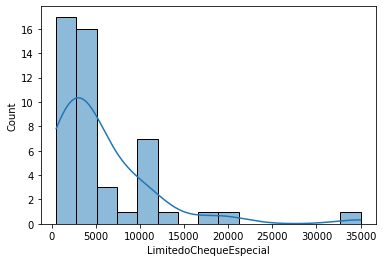

In [23]:
sns.histplot(df, x = "LimitedoChequeEspecial", kde = True);

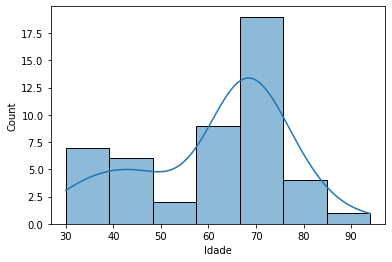

In [24]:
sns.histplot(df, x = "Idade", kde= True);

In [26]:
df.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Região,Gênero,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,0.375000,0.458333,0.500000,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,0.489246,0.503534,0.505291,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,0.000000,0.000000,0.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,0.000000,0.000000,0.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,0.000000,0.000000,0.500000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,1.000000,1.000000,1.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,1.000000,1.000000,1.000000,35000.000000


In [33]:
scaler = MinMaxScaler()

df_normalized= pd.DataFrame(scaler.fit_transform(df), index = df.index, columns= df.columns)
df_normalized.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Região,Gênero,LimitedoChequeEspecial
0,0.625000,0.083911,0.023518,0.018987,0.0,0.0,0.0,0.000000
1,0.593750,0.009126,0.019278,0.012658,0.0,0.0,0.0,0.002899
2,0.218750,0.019557,0.035128,0.050633,0.0,0.0,0.0,0.008696
3,0.656250,0.000000,0.005409,0.525316,0.0,0.0,0.0,0.014493
4,0.703125,0.001304,0.007390,0.841772,0.0,0.0,0.0,0.014493


In [34]:
df_normalized.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Região,Gênero,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
function = "LimitedoChequeEspecial ~ Idade + RendimentoTotal + Salario + LimitedeCreditoImediato + Escolaridade + Região + Gênero"
model = smf.ols(formula= function, data = df_normalized).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Tue, 07 Mar 2023   Prob (F-statistic):           7.44e-17
Time:                            14:55:42   Log-Likelihood:                 67.328
No. Observations:                      48   AIC:                            -118.7
Df Residuals:                          40   BIC:                            -103.7
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [44]:
function = "LimitedoChequeEspecial ~ RendimentoTotal + Salario + LimitedeCreditoImediato + Escolaridade + Região + Gênero"
model = smf.ols(formula= function, data = df_normalized).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Tue, 07 Mar 2023   Prob (F-statistic):           9.97e-18
Time:                            14:56:15   Log-Likelihood:                 67.299
No. Observations:                      48   AIC:                            -120.6
Df Residuals:                          41   BIC:                            -107.5
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [45]:
function = "LimitedoChequeEspecial ~ RendimentoTotal + Salario + Escolaridade + Região + Gênero"
model = smf.ols(formula= function, data = df_normalized).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Tue, 07 Mar 2023   Prob (F-statistic):           1.39e-18
Time:                            14:56:20   Log-Likelihood:                 67.097
No. Observations:                      48   AIC:                            -122.2
Df Residuals:                          42   BIC:                            -111.0
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [47]:
function = "LimitedoChequeEspecial ~ RendimentoTotal + Salario + Região + Gênero"
model = smf.ols(formula= function, data = df_normalized).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.883
Model:                                OLS   Adj. R-squared:                  0.872
Method:                     Least Squares   F-statistic:                     80.75
Date:                    Tue, 07 Mar 2023   Prob (F-statistic):           2.02e-19
Time:                            14:56:54   Log-Likelihood:                 66.709
No. Observations:                      48   AIC:                            -123.4
Df Residuals:                          43   BIC:                            -114.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [49]:
function = "LimitedoChequeEspecial ~ Salario + Região + Gênero"
model = smf.ols(formula= function, data = df_normalized).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Tue, 07 Mar 2023   Prob (F-statistic):           3.24e-20
Time:                            14:57:09   Log-Likelihood:                 66.039
No. Observations:                      48   AIC:                            -124.1
Df Residuals:                          44   BIC:                            -116.6
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [50]:
function = "LimitedoChequeEspecial ~ Salario + Região + Gênero - 1"
model = smf.ols(formula= function, data = df_normalized).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.925
Model:                                OLS   Adj. R-squared (uncentered):              0.920
Method:                     Least Squares   F-statistic:                              185.0
Date:                    Tue, 07 Mar 2023   Prob (F-statistic):                    2.56e-25
Time:                            14:57:28   Log-Likelihood:                          64.573
No. Observations:                      48   AIC:                                     -123.1
Df Residuals:                          45   BIC:                                     -117.5
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [51]:
x = df_normalized[["Salario", "Gênero", "Região"]]
y = df_normalized[["LimitedoChequeEspecial"]]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [59]:
r_sqr = lr.score(x, y)
r_sqr

0.87437003221887

In [60]:
y_pred_train = lr.predict(x_train)
print("MAE:", metrics.mean_absolute_error(y_train, y_pred_train))
print("MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.03369009365701895
MSE: 0.002252899550747987
RMSE: 0.04746471901052388


In [61]:
lr.fit(x_test,y_test)

LinearRegression()

In [62]:
y_pred_test = lr.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_test))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 0.05541300381835509
MSE: 0.004198447615484172
RMSE: 0.0647954289706008


### Exercício 
 Prever os preços dos automóveis através de variáveis explicativas
 
 E por fim, calcular as métricas de sucesso

In [70]:
df_car = pd.read_csv("/content/C+¦pia de CarPrice_Assignment.csv")
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [77]:
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [79]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [82]:
df_car.cylindernumber

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: cylindernumber, Length: 205, dtype: object

In [73]:
df_car.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [74]:
df_car.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [75]:
df_car.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [80]:
df_car.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [88]:
le.fit(df_car.CarName)
df_car.CarName = le.transform(df_car.CarName)

le.fit(df_car.fueltype)
df_car.fueltype = le.transform(df_car.fueltype)

le.fit(df_car.aspiration)
df_car.aspiration = le.transform(df_car.aspiration)

le.fit(df_car.doornumber)
df_car.doornumber = le.transform(df_car.doornumber)

le.fit(df_car.carbody)
df_car.carbody = le.transform(df_car.carbody)

le.fit(df_car.drivewheel)
df_car.drivewheel = le.transform(df_car.drivewheel)

le.fit(df_car.enginelocation)
df_car.enginelocation = le.transform(df_car.enginelocation)

le.fit(df_car.fuelsystem)
df_car.fuelsystem = le.transform(df_car.fuelsystem)

le.fit(df_car.enginetype)
df_car.enginetype = le.transform(df_car.enginetype)

le.fit(df_car.cylindernumber)
df_car.cylindernumber = le.transform(df_car.cylindernumber)

In [89]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [91]:
df_car.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


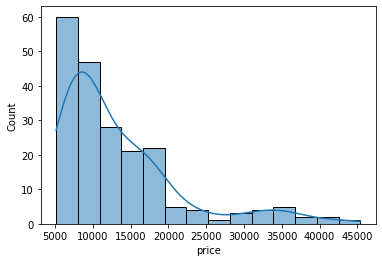

In [96]:
sns.histplot(df_car, x = "price", kde= True);

In [103]:
scaler =  MinMaxScaler()
car_normalized = pd.DataFrame(scaler.fit_transform(df_car), index = df_car.index, columns = df_car.columns)
car_normalized.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [104]:
car_normalized.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.500000,0.566829,0.528834,0.902439,0.180488,0.439024,0.653659,0.663415,0.014634,0.354419,...,0.248707,0.464808,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190,0.202540
std,0.290797,0.249061,0.280922,0.297446,0.385535,0.497483,0.214770,0.278085,0.120377,0.175562,...,0.157142,0.287601,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222,0.198323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.301370,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.230321,...,0.135849,0.142857,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066283
50%,0.500000,0.600000,0.547945,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.303207,...,0.222642,0.714286,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.128519
75%,0.750000,0.800000,0.787671,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.460641,...,0.301887,0.714286,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
car_normalized.corr()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.967077,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,...,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,0.967077,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,...,-0.153982,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439
fueltype,-0.125568,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.190352,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.098303,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.051406,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816


In [130]:
function = "price ~ symboling + CarName +fueltype + aspiration + doornumber + carbody + drivewheel + enginelocation + wheelbase + carlength + carwidth + carheight + curbweight +enginetype + cylindernumber + enginesize +fuelsystem + boreratio + stroke + compressionratio + horsepower + peakrpm + citympg + highwaympg"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     66.24
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           2.26e-76
Time:                        17:35:46   Log-Likelihood:                 275.56
No. Observations:                 205   AIC:                            -501.1
Df Residuals:                     180   BIC:                            -418.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1177      0.191  

In [131]:
function = "price ~ symboling + CarName + aspiration + doornumber + carbody + drivewheel + enginelocation + wheelbase + carlength + carwidth + carheight + curbweight +enginetype + cylindernumber + enginesize +fuelsystem + boreratio + stroke + compressionratio + horsepower + peakrpm + citympg + highwaympg"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     69.50
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           2.70e-77
Time:                        17:38:59   Log-Likelihood:                 275.55
No. Observations:                 205   AIC:                            -503.1
Df Residuals:                     181   BIC:                            -423.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0960      0.077  

In [134]:
function = "price ~ CarName + aspiration + doornumber + carbody + drivewheel + enginelocation + wheelbase + carlength + carwidth + carheight + curbweight +enginetype + cylindernumber + enginesize +fuelsystem + boreratio + stroke + compressionratio + horsepower + peakrpm + citympg + highwaympg"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     73.03
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           3.22e-78
Time:                        17:39:42   Log-Likelihood:                 275.52
No. Observations:                 205   AIC:                            -505.0
Df Residuals:                     182   BIC:                            -428.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0898      0.073  

In [135]:
function = "price ~ CarName + aspiration + doornumber + carbody + drivewheel + enginelocation + wheelbase + carwidth + carheight + curbweight +enginetype + cylindernumber + enginesize +fuelsystem + boreratio + stroke + compressionratio + horsepower + peakrpm + citympg + highwaympg"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     76.89
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           3.76e-79
Time:                        17:40:20   Log-Likelihood:                 275.47
No. Observations:                 205   AIC:                            -506.9
Df Residuals:                     183   BIC:                            -433.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0943      0.071  

In [136]:
function = "price ~ CarName + aspiration + doornumber + carbody + drivewheel + enginelocation + wheelbase + carwidth + carheight + curbweight +enginetype + cylindernumber + enginesize + boreratio + stroke + compressionratio + horsepower + peakrpm + citympg + highwaympg"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     81.06
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           4.63e-80
Time:                        17:40:56   Log-Likelihood:                 275.34
No. Observations:                 205   AIC:                            -508.7
Df Residuals:                     184   BIC:                            -438.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0872      0.069  

In [137]:
function = "price ~ CarName + aspiration + doornumber + carbody + drivewheel + enginelocation + wheelbase + carwidth + carheight + curbweight + enginetype + enginesize + boreratio + stroke + compressionratio + horsepower + peakrpm + citympg + highwaympg"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     85.65
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           5.66e-81
Time:                        17:41:54   Log-Likelihood:                 275.18
No. Observations:                 205   AIC:                            -510.4
Df Residuals:                     185   BIC:                            -443.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0777      0.067  

In [138]:
function = "price ~ CarName + aspiration + doornumber + carbody + drivewheel + enginelocation + wheelbase + carwidth + carheight + curbweight + enginetype + enginesize + boreratio + stroke + compressionratio + horsepower + peakrpm + highwaympg"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     90.68
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           7.09e-82
Time:                        17:42:23   Log-Likelihood:                 274.97
No. Observations:                 205   AIC:                            -511.9
Df Residuals:                     186   BIC:                            -448.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0812      0.067  

In [140]:
function = "price ~ CarName + doornumber + carbody + drivewheel + enginelocation + wheelbase + carwidth + carheight + curbweight + enginetype + enginesize + boreratio + stroke + compressionratio + horsepower + peakrpm + highwaympg"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     96.35
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           8.32e-83
Time:                        17:43:29   Log-Likelihood:                 274.79
No. Observations:                 205   AIC:                            -513.6
Df Residuals:                     187   BIC:                            -453.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0773      0.066  

In [142]:
function = "price ~ CarName + doornumber + carbody + drivewheel + enginelocation + wheelbase + carwidth + carheight + curbweight + enginetype + enginesize + boreratio + stroke + compressionratio + horsepower + peakrpm"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     102.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           1.02e-83
Time:                        17:45:21   Log-Likelihood:                 274.54
No. Observations:                 205   AIC:                            -515.1
Df Residuals:                     188   BIC:                            -458.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0455      0.047  

In [143]:
function = "price ~ CarName + doornumber + carbody + drivewheel + enginelocation + wheelbase + carwidth + carheight + curbweight + enginesize + boreratio + stroke + compressionratio + horsepower + peakrpm"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     109.5
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           1.43e-84
Time:                        17:45:57   Log-Likelihood:                 274.09
No. Observations:                 205   AIC:                            -516.2
Df Residuals:                     189   BIC:                            -463.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0316      0.044  

In [144]:
function = "price ~ CarName + doornumber + carbody + drivewheel + enginelocation + wheelbase + carwidth + carheight + curbweight + enginesize + boreratio + stroke + compressionratio + horsepower + peakrpm - 1"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              238.1
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                   2.35e-114
Time:                        17:46:47   Log-Likelihood:                          273.81
No. Observations:                 205   AIC:                                     -517.6
Df Residuals:                     190   BIC:                                     -467.8
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [145]:
function = "price ~ CarName + doornumber + carbody + drivewheel + enginelocation + wheelbase + carwidth + carheight + curbweight + enginesize + stroke + compressionratio + horsepower + peakrpm - 1"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              254.0
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                   3.40e-115
Time:                        17:47:12   Log-Likelihood:                          272.89
No. Observations:                 205   AIC:                                     -517.8
Df Residuals:                     191   BIC:                                     -471.3
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [146]:
function = "price ~ CarName + doornumber + carbody + drivewheel + enginelocation + carwidth + carheight + curbweight + enginesize + stroke + compressionratio + horsepower + peakrpm - 1"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              272.1
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                   5.21e-116
Time:                        17:47:34   Log-Likelihood:                          271.87
No. Observations:                 205   AIC:                                     -517.7
Df Residuals:                     192   BIC:                                     -474.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [128]:
function = "price ~ CarName + fueltype + doornumber + carbody + drivewheel + enginelocation + carwidth + carheight + curbweight + enginesize + stroke + horsepower + peakrpm - 1"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              275.2
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                   1.87e-116
Time:                        17:31:32   Log-Likelihood:                          272.96
No. Observations:                 205   AIC:                                     -519.9
Df Residuals:                     192   BIC:                                     -476.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [147]:
function = "price ~ CarName + fueltype + carbody + drivewheel + enginelocation + carwidth + carheight + curbweight + enginesize + stroke + horsepower + peakrpm - 1"
model = smf.ols(formula=function, data= car_normalized).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              295.3
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                   4.09e-117
Time:                        17:48:01   Log-Likelihood:                          271.52
No. Observations:                 205   AIC:                                     -519.0
Df Residuals:                     193   BIC:                                     -479.2
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [151]:
x = car_normalized[["CarName", "fueltype", "carbody", "drivewheel", "enginelocation", "carwidth", "carheight", "curbweight", "enginesize", "stroke", "horsepower","peakrpm"]]
y = car_normalized[["price"]]

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [154]:
r_sq= lr.score(x_train, y_train)
print(r_sq)

0.9006122728949129


In [155]:
y_pred_train = lr.predict(x_train)
print("MAE:", metrics.mean_absolute_error(y_train, y_pred_train))
print("MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.0476943407078223
MSE: 0.0036528563612492544
RMSE: 0.06043886465883732


In [156]:
lr.fit(x_test,y_test)

LinearRegression()

In [157]:
r_sq= lr.score(x_test, y_test)
print(r_sq)

0.9122516651535582


In [158]:
y_pred_test = lr.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_test))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 0.04237266663919013
MSE: 0.0042690975264773005
RMSE: 0.06533833121895065
